# Assignment 4 - Convolutional Neural Network



In this assignment we will develop a neural network with fully-connected layers to perform classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import datasets
if sys.version_info >= (3, 0):
    def xrange(*args, **kwargs):
        return iter(range(*args, **kwargs))

In [2]:
#load dataset
def load_dataset():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    return X, y

def train_test_split(X, y):
    idx = np.arange(len(X))
    train_size = int(len(X) * 2/3)
    val_size = int(len(X) * 1/6)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

We will use the following class `TwoLayerCNN` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation. You need to complete the functions.

In [443]:
class TwoLayerCNN(object):
    
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    N, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        #print(self.params['W1'])
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        # Compute the forward pass
        scores = None
        #############################################################################
        # Full Mark: 1                                                              #
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        
        # Using ReLUs as the Activation Function
        
        #print("X", X.shape, X)
        #print("W1", W1.shape, W1)
        #print("b1", b1.shape, b1)
        Z1 = np.dot(X, W1) + b1
        #print("Z1", Z1.shape, Z1)
        # Perform ReLU
        X2 = np.maximum(0, Z1)
        #print("X2", X2.shape, X2)
        #print("W2", W2.shape, W2)
        Z2 = np.dot(X2, W2) + b2
        # perform softmax?
        softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 0)
        scores = softmax(Z2)
        #scores = Z2
        #scores = np.maximum(0, Z2)
        #print("Scores", scores.shape, scores)
        
        scores_lay1 = Z1
        scores_lay2 = Z2
        h1 = X2
        
        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
        loss = None

        scores -= np.max(scores, axis=1, keepdims=True) # avoid numeric instability

        #############################################################################
        # Full Mark: 2                                                              #
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Softmax           #
        # classifier loss.                                                          #
        #############################################################################

        '''
        softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
        p = softmax(scores)
        loss = (1 / N) * np.sum(-np.log(p[np.arange(N), y]))
        loss += reg * (np.sum(W2 ** 2) + np.sum(W1 ** 2)) # regularization
        '''
        
        max_scores = np.amax(scores, axis = 1) # (N, )
        exp_scores = np.exp(scores - max_scores[:, None]) # (N, C)
        probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) # (N, C)
        correct_logprobs = -np.log(probs[range(N), y]) # (N, )
        data_loss = np.mean(correct_logprobs)
        reg_loss = reg * (np.sum(W1 ** 2) + np.sum(W2 ** 2))
        loss = data_loss + reg_loss

        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        # Backward pass: compute gradients
        grads = {}
        #############################################################################
        # Full Mark: 2                                                              #
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################

        '''
        dZ2 = (1 / N) * (p[np.arange(N), y] - 1.0)
        print("dZ2", dZ2.shape)

        # W2 gradient
        dW2 = np.dot(X2.T, dZ2)
        print('W2', W2.shape, dW2.shape)

        # b2 gradient
        db2 = np.sum(dZ2)

        # W1 gradient
        dZ1 = np.dot(dZ2, W2.T) * Z1
        dW1 = np.dot(X.T, dZ1)
        print('W1', W1.shape, dW1.shape)

        # b1 gradient
        db1 = np.sum(dZ1)

        # regularization gradient
        dW1 += reg * 2 * W1
        dW2 += reg * 2 * W2

        # store the results in the grads dictionary
        grads = {'W1':dW1, 'b1':db1, 'W2':dW2, 'b2':db2}
        '''
        
        # softmax gradient
        dscores = probs
        dscores[range(N), y] -= 1 # from softmax derivative
        dscores /= N
        
        # W2 gradient + regularization
        grads['W2'] = np.dot(h1.T, dscores)
        grads['W2'] += 2 * reg * W2
        #print(grads['W2'])
        
        # b2 gradient
        grads['b2'] = np.sum(dscores, axis = 0)
        
        # hidden layer 1 gradient
        dh1 = np.dot(dscores, W2.T)
        
        # ReLU gradient
        dh1_dscores_lay1 = np.ones(scores_lay1.shape)
        dh1_dscores_lay1[scores_lay1 < 0] = 0
        dscores_lay1 = dh1_dscores_lay1 * dh1
        
        # W1 gradient + regularization
        grads['W1'] = np.dot(X.T, dscores_lay1)
        grads['W1'] += 2 * reg * W1
        #print(grads['W1'])
        
        # b1 gradient
        grads['b1'] = np.sum(dscores_lay1, axis = 0)
        
        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        return loss, grads

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in xrange(num_iters):

          #########################################################################
          # Full Mark: 0.5                                                        #
          # TODO: Create a random minibatch of training data and labels using     #
          # given num_train and batch_size, storing them in X_batch and y_batch   #
          # respectively.                                                         #
          #########################################################################

            idx = np.random.choice(num_train, batch_size)
            #print(idx.size, idx)
            X_batch = X[idx]
            y_batch = y[idx]

          #########################################################################
          #                             END OF YOUR CODE                          #
          #########################################################################

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y = y_batch, reg = reg)
            loss_history.append(loss)

          #########################################################################
          # Full Mark: 0.5                                                        #
          # TODO: Use the gradients in the grads dictionary to update the         #
          # parameters of the network (stored in the dictionary self.params)      #
          # using stochastic gradient descent. You'll need to use the gradients   #
          # stored in the grads dictionary defined above.                         #
          #########################################################################

            self.params['W1'] = self.params['W1'] - (learning_rate * grads['W1'])
            self.params['W2'] = self.params['W2'] - (learning_rate * grads['W2'])
            self.params['b1'] = self.params['b1'] - (learning_rate * grads['b1'])
            self.params['b2'] = self.params['b2'] - (learning_rate * grads['b2'])

          #########################################################################
          #                             END OF YOUR CODE                          #
          #########################################################################

            if verbose and it % 10 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """

        ###########################################################################
        # Full Mark: 1                                                            #
        # TODO: Implement this function                                           #
        ###########################################################################
        
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        Z1 = np.dot(X, W1) + b1
        X2 = np.maximum(0, Z1)
        Z2 = np.dot(X2, W2) + b2
        scores = Z2
        # perform softmax?
        #softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 0)
        #scores = softmax(Z2)
        y_pred = np.argmax(scores, axis = 1)
        #print(y_pred)

        ###########################################################################
        #                              END OF YOUR CODE                           #
        ###########################################################################

        return y_pred

In [451]:
# To check your implementations.
X,y =load_dataset()
X_train, y_train, X_val, y_val, X_test, y_test=train_test_split(X, y)

###########################################################################
# Full Mark: 1                                                            #
# TODO: 1. Using TwoLayerCNN to train on given datasets                   #
#       2. Print out the final loss                                       #
#       3. Print out the test accuracy                                    #
###########################################################################

#print(X_train.shape) # (100, 4)
#print(y_train.shape) # (100, ) -> 3 classes
#print(X_val.shape) # (25, 4)
#print(y_val.shape) # (25, )

input_size = 4
hidden_size = 8
num_classes = 3
net = TwoLayerCNN(input_size, hidden_size, num_classes, std = 1e-4)
# TODO
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters = 100, batch_size = 20, learning_rate = 1e-6, learning_rate_decay = 0.97,
            reg = 5e-6, verbose = True)

print('Final Loss:', stats['loss_history'][-1])
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

###########################################################################
#                              END OF YOUR CODE                           #
###########################################################################


iteration 0 / 100: loss 1.098612
iteration 10 / 100: loss 1.098612
iteration 20 / 100: loss 1.098612
iteration 30 / 100: loss 1.098612
iteration 40 / 100: loss 1.098612
iteration 50 / 100: loss 1.098612
iteration 60 / 100: loss 1.098612
iteration 70 / 100: loss 1.098612
iteration 80 / 100: loss 1.098612
iteration 90 / 100: loss 1.098612
Final Loss: 1.0986122879927076
Test accuracy:  0.36


The loss function and the accuracies on the training and validation sets would give more insight views.

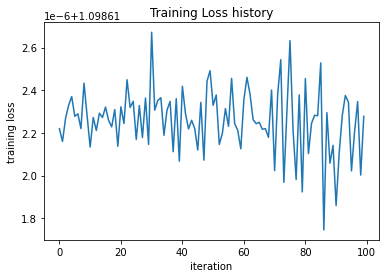

In [184]:
###########################################################################
# Full Mark: 0.5                                                          #
# TODO: Plot training loss history                                        # 
###########################################################################

plt.plot(stats['loss_history'])

###########################################################################
#                              END OF YOUR CODE                           #
###########################################################################   
    
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()


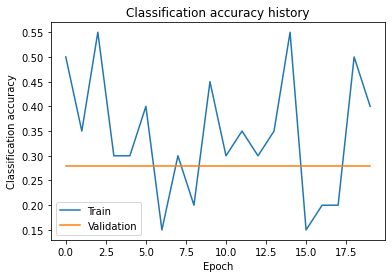

In [185]:
###########################################################################
# Full Mark: 0.5                                                          #
# TODO: Plot Classification accuracy history, compare train/val accuracy  #
###########################################################################

plt.plot(stats['train_acc_history'], label = 'Train')
plt.plot(stats['val_acc_history'], label = 'Validation')

###########################################################################
#                              END OF YOUR CODE                           #
###########################################################################  

plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.title('Classification accuracy history')
plt.legend()
plt.show()

In [148]:
###############################################################################
# Full Mark: 1                                                                #
# TODO: Describe or using codes to show how you tune your hyperparameters     #
# (hidden layer size, learning rate, numer of training epochs, regularization #
# strength and so on). Is your result good? Does it look underfiting?         #
# Overfiting?                                                                 #
###############################################################################



###############################################################################
#                              END OF YOUR CODE                               #
###############################################################################  

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$